In [1]:
!pip install nba_api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

import pandas as pd
import numpy as np

  Using cached nba_api-1.1.14-py3-none-any.whl (254 kB)
  Using cached numpy-1.23.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.21.3 requires tokenizers!=0.11.3,<0.13,>=0.11.1, but you have tokenizers 0.13.1 which is incompatible.
matminer 0.7.4 requires jsonschema>=3.2.0, but you have jsonschema 3.1.1 which is incompatible.
fenics-dolfin 2019.1.0 requires pybind11==2.2.4, but you have pybind11 2.9.2 which is incompatible.
datasets 2.2.1 requires pyarrow>=6.0.0, but you have pyarrow 5.0.0 which is incompatible.


In [2]:
!pip install --upgrade nba_api

## Below i'm doing the process for one team (celtics) but this will be generalized over all teams

### Don't run this.. This is just for tutorial purpose

In [2]:
"""from nba_api.stats.static import teams

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == 'NOP'][0]
celtics_id = celtics['id']"""

"from nba_api.stats.static import teams\n\nnba_teams = teams.get_teams()\n# Select the dictionary for the Celtics, which contains their team ID\nceltics = [team for team in nba_teams if team['abbreviation'] == 'NOP'][0]\nceltics_id = celtics['id']"

In [3]:
"""from nba_api.stats.endpoints import leaguegamefinder

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games"""


'from nba_api.stats.endpoints import leaguegamefinder\n\n# Query for games where the Celtics were playing\ngamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)\n# The first DataFrame of those returned is what we want.\ngames = gamefinder.get_data_frames()[0]\ngames'

## Want games over the last 10 years excluding 2022

### So this is NBA games over the last 10 years for the boston celtics

In [4]:
games_10 = games[(games.GAME_DATE >= '2011-08-16') & (games.GAME_DATE < '2022-06-16')]

NameError: name 'games' is not defined

## Below is a function to keep only home or away games.

In [2]:

def keep_games(df, keep_method='home'):
    '''Combine a TEAM_ID-GAME_ID unique table into rows by game. Slow.

        Parameters
        ----------
        df : Input DataFrame.
        keep_method : {'home', 'away', 'winner', 'loser', ``None``}, default 'home'
            - 'home' : Keep rows where TEAM_A is the home team.
            - 'away' : Keep rows where TEAM_A is the away team.
            - 'winner' : Keep rows where TEAM_A is the losing team.
            - 'loser' : Keep rows where TEAM_A is the winning team.
            - ``None`` : Keep all rows. Will result in an output DataFrame the same
                length as the input DataFrame.
                
        Returns
        -------
        result : DataFrame
    '''
    if keep_method =='home':
        result = df[df["MATCHUP"].str.contains(" vs. ")]

        
    elif keep_method =="away":
        result = df[df["MATCHUP"].str.contains(" @ ")]
        
        
    
    return result
    


In [6]:
away_df = keep_games(games_10,keep_method="away")
home_df = keep_games(games_10,keep_method="home")

NameError: name 'games_10' is not defined

In [7]:
away_df

NameError: name 'away_df' is not defined

In [8]:
home_df

NameError: name 'home_df' is not defined

In [9]:
games_10[games_10["MATCHUP"].str.contains(" vs. ")]

NameError: name 'games_10' is not defined

## Below is a function that translates L to 0 and W to 1 -- this helps us calculate the actual number of losses and wins. 

In [3]:
def clean_wins(df):
    df["win"] = [1 if i=="W" else 0 for i in df["WL"]]
    return df

In [11]:
sf = "2019"
sf[:4]

'2019'

## Next is a function that groups the games by season_id so we can get season averages.

In [4]:
def grouper(df):
    return df.groupby("SEASON_ID").agg(np.sum)

In [13]:
games_10.groupby("SEASON_ID").agg(np.sum)

NameError: name 'games_10' is not defined

## Last function is to only look at regular season

In [5]:
def reg(df):
    at_least_20 = pd.DataFrame(df.groupby("SEASON_ID").size()>20).reset_index()
    the_df = df.merge(at_least_20,on="SEASON_ID").rename(columns={0:"Regular_season"})
    
    return the_df[the_df["Regular_season"]==True]
        
    


## Overall pipeline

In [15]:
away_df = keep_games(games_10,keep_method="away")
home_df = keep_games(games_10,keep_method="home")

NameError: name 'games_10' is not defined

In [16]:
for_away = clean_wins(away_df)
for_home = clean_wins(home_df)

NameError: name 'away_df' is not defined

In [17]:
reg_away = reg(away_df)
reg_home = reg(home_df)

NameError: name 'away_df' is not defined

In [18]:
grouped_home = grouper(reg_home)
grouped_away = grouper(reg_away)

NameError: name 'reg_home' is not defined

In [19]:
grouped_away

NameError: name 'grouped_away' is not defined

In [20]:
grouped_home

NameError: name 'grouped_home' is not defined

## Now we have a streamlined process to generate these tables for each team.

### Below we generate a table for each team

In [6]:
nba_teams = teams.get_teams()
the_abreviations = [nba_teams[i]["abbreviation"] for i in range(len(nba_teams))]
nba_teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [7]:
import time

In [8]:
def get_games(abbreviation_lst):
    nba_teams = teams.get_teams()
    the_tracker = {}
    for i in abbreviation_lst:
        team = [team for team in nba_teams if team['abbreviation'] == i][0]
        team_id = team['id']
        ## get all the games
        time.sleep(2)
        game_finder_two = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
        ## Storing games in the following: {team_1:[home_df,away_df],team2:[home_df,away_df]}
        games_two = game_finder_two.get_data_frames()[0]
        isolated_dates = games_two[(games_two.GAME_DATE >= '2011-08-16') & (games_two.GAME_DATE < '2022-06-16')]
        away_games = keep_games(isolated_dates,keep_method="away")
        home_games = keep_games(isolated_dates,keep_method="home")
        for_away = clean_wins(away_games)
        for_home = clean_wins(home_games)
        reg_away = reg(for_away)
        reg_home = reg(for_home)
        grouped_home = grouper(reg_home)
        grouped_away = grouper(reg_away)
        the_tracker[i]= [grouped_home,grouped_away]
        print(i)
    return the_tracker


        
        
        
        
        
        

In [9]:

the_process = get_games(the_abreviations)


/tmp/ipykernel_24/1099542775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["win"] = [1 if i=="W" else 0 for i in df["WL"]]


ATL
BOS
CLE
NOP
CHI
DAL
DEN
GSW
HOU
LAC
LAL
MIA
MIL
MIN
BKN
NYK
ORL
IND
PHI
PHX
POR
SAC
SAS
OKC
TOR
UTA
MEM
WAS
DET
CHA


## EDA part 

In [10]:
def combine_dfs(dic,home=True):
    empty_data_frame = pd.DataFrame()
    for i in dic:
        if home==True:
            empty_data_frame = pd.concat([empty_data_frame,dic[i][0]], ignore_index=True)
        else:
            empty_data_frame = pd.concat([empty_data_frame,dic[i][1]], ignore_index=True)
            
    return empty_data_frame
        

In [11]:
home_combined_df = combine_dfs(the_process)

In [12]:
away_combined_df = combine_dfs(the_process,False)

In [13]:
away_combined_df

,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,win,Regular_season
0,53150220321,8035,3105,1204,2658,14.946,250,680.0,12.144,447,...,1006.0,1320.0,712,283.0,145,448,590,66.0,17,33
1,70866960428,10485,4195,1610,3513,20.171,359,975.0,16.095,616,...,1366.0,1761.0,1017,358.0,203,639,826,-8.6,21,44
2,69256347691,10323,4305,1615,3501,19.891,406,1113.0,15.621,669,...,1293.0,1674.0,1032,363.0,175,650,862,-115.0,15,43
3,74088185902,10912,4557,1678,3714,20.815,433,1173.0,17.045,768,...,1417.0,1815.0,1064,409.0,223,639,891,96.0,27,46
4,70866960428,10482,4407,1626,3661,19.529,416,1217.0,14.954,739,...,1469.0,1856.0,1031,397.0,241,659,859,41.0,22,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,72477574470,10660,4704,1697,3832,19.954,439,1191.0,16.217,871,...,1550.0,2006.0,921,316.0,170,526,786,-32.0,18,45
326,69256348938,10332,4616,1686,3868,18.782,501,1477.0,14.490,743,...,1390.0,1830.0,962,320.0,197,492,785,-255.4,15,43
327,61203285108,8843,3705,1349,3154,16.576,434,1266.0,13.039,573,...,1177.0,1581.0,851,252.0,141,496,694,-248.2,15,38
328,57982059576,8694,3979,1434,3157,16.371,489,1331.0,13.233,622,...,1151.0,1532.0,972,301.0,168,512,645,-135.0,15,36


In [14]:
home_combined_df[home_combined_df["win"]==min(home_combined_df["win"])]

,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,win,Regular_season
319,53150221278,7951,2875,1078,2651,13.457,119,419.0,9.34,600,...,927.0,1282.0,683,188.0,204,419,643,-408.0,4,33


## Downloading the combined files so we'll have one CSV for home games, and one for away

In [15]:
away_combined_df.to_csv("away_table")

<Figure size 2000x2000 with 0 Axes>

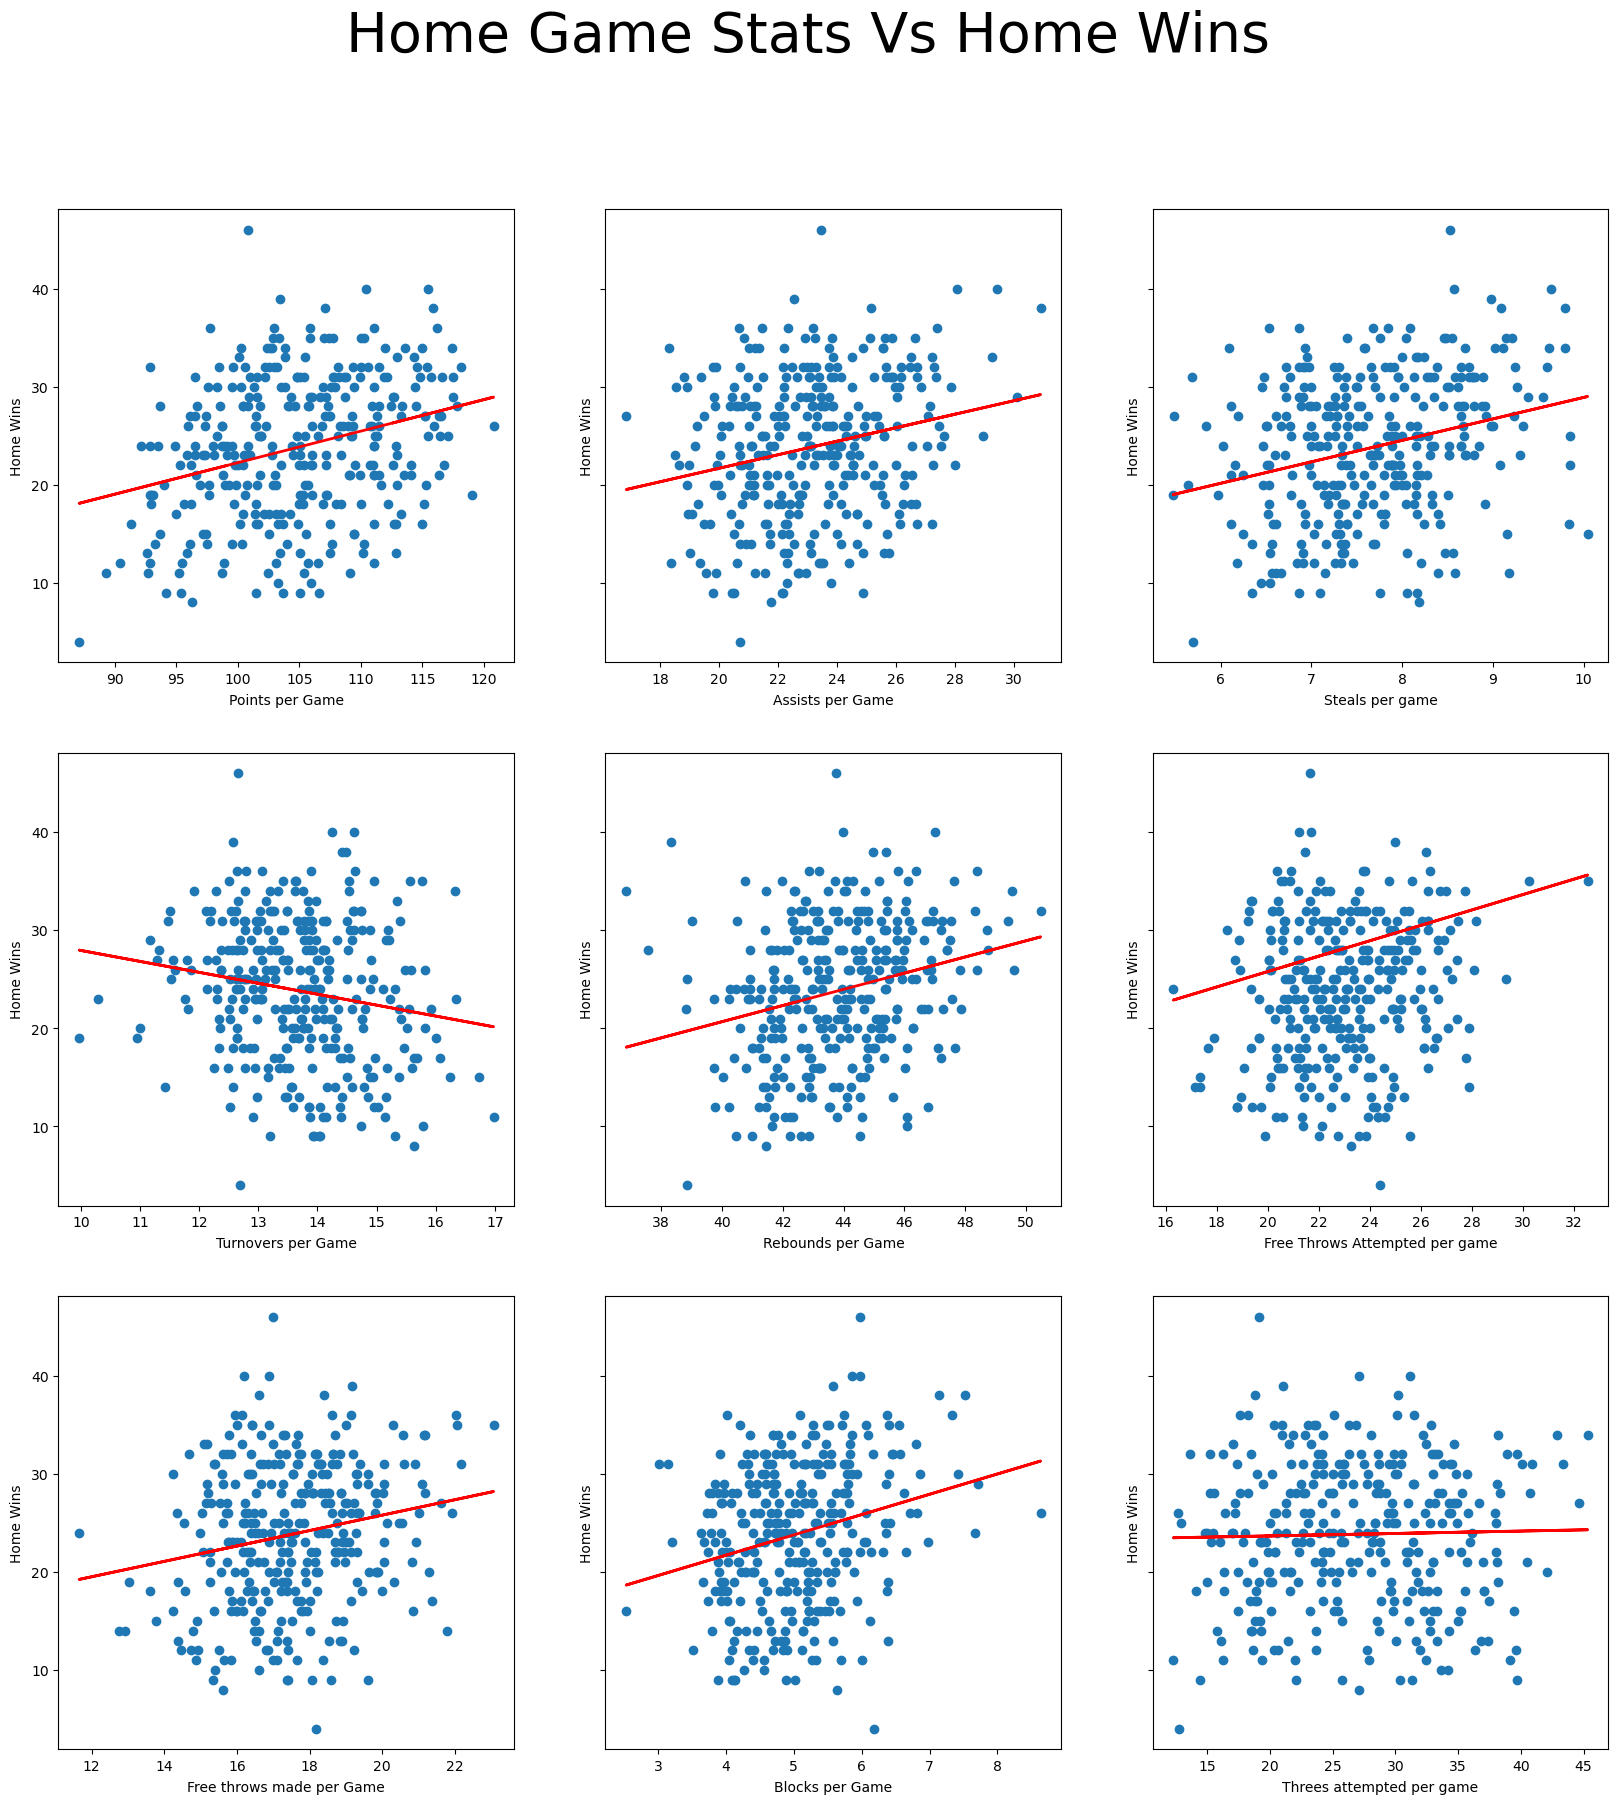

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def getRand(n):
    return np.random.normal(scale=10, size=n)

f = plt.figure(figsize=(20, 20))
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=False, sharey = True,figsize=(20, 20))
a, b = np.polyfit(home_combined_df["PTS"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)
PPG = axes[0][0].scatter(home_combined_df["PTS"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[0][0].plot(home_combined_df["PTS"]/home_combined_df["Regular_season"], a*(home_combined_df["PTS"]/home_combined_df["Regular_season"])+b, color='Red', linewidth=2)

d, r = np.polyfit(home_combined_df["AST"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

APG = axes[0][1].scatter(home_combined_df["AST"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[0][1].plot(home_combined_df["AST"]/home_combined_df["Regular_season"], d*(home_combined_df["AST"]/home_combined_df["Regular_season"])+r, color='Red', linewidth=2)


s, t = np.polyfit(home_combined_df["TOV"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

TPG = axes[1][0].scatter(home_combined_df["TOV"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[1][0].plot(home_combined_df["TOV"]/home_combined_df["Regular_season"], s*(home_combined_df["TOV"]/home_combined_df["Regular_season"])+t, color='Red', linewidth=2)


n, d = np.polyfit(home_combined_df["REB"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

RPG = axes[1][1].scatter(home_combined_df["REB"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[1][1].plot(home_combined_df["REB"]/home_combined_df["Regular_season"], n*(home_combined_df["REB"]/home_combined_df["Regular_season"])+d, color='Red', linewidth=2)



l, q = np.polyfit(home_combined_df["FTM"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

FTM = axes[2][0].scatter(home_combined_df["FTM"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[2][0].plot(home_combined_df["FTM"]/home_combined_df["Regular_season"], l*(home_combined_df["FTM"]/home_combined_df["Regular_season"])+q, color='Red', linewidth=2)



w, t = np.polyfit(home_combined_df["BLK"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

BLK = axes[2][1].scatter(home_combined_df["BLK"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[2][1].plot(home_combined_df["BLK"]/home_combined_df["Regular_season"], w*(home_combined_df["BLK"]/home_combined_df["Regular_season"])+t, color='Red', linewidth=2)

ww, tt = np.polyfit(home_combined_df["FG3A"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

FG3A = axes[2][2].scatter(home_combined_df["FG3A"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[2][2].plot(home_combined_df["FG3A"]/home_combined_df["Regular_season"], ww*(home_combined_df["FG3A"]/home_combined_df["Regular_season"])+tt, color='Red', linewidth=2)


www, ttt = np.polyfit(home_combined_df["FTM"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

FTA = axes[1][2].scatter(home_combined_df["FTA"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[1][2].plot(home_combined_df["FTA"]/home_combined_df["Regular_season"], www*(home_combined_df["FTA"]/home_combined_df["Regular_season"])+ttt, color='Red', linewidth=2)

w2, t2 = np.polyfit(home_combined_df["STL"]/home_combined_df["Regular_season"],home_combined_df["win"], 1)

STL = axes[0][2].scatter(home_combined_df["STL"]/home_combined_df["Regular_season"],home_combined_df["win"])
axes[0][2].plot(home_combined_df["STL"]/home_combined_df["Regular_season"], w2*(home_combined_df["STL"]/home_combined_df["Regular_season"])+t2, color='Red', linewidth=2)



axes[0][0].set_xlabel('Points per Game', labelpad = 5)
axes[0][1].set_xlabel('Assists per Game', labelpad = 5)
axes[1][0].set_xlabel('Turnovers per Game', labelpad = 5)
axes[1][1].set_xlabel('Rebounds per Game', labelpad = 5)
axes[2][0].set_xlabel('Free throws made per Game', labelpad = 5)
axes[2][1].set_xlabel('Blocks per Game', labelpad = 5)
axes[1][2].set_xlabel('Free Throws Attempted per game', labelpad = 5)
axes[2][2].set_xlabel('Threes attempted per game', labelpad = 5)
axes[0][2].set_xlabel('Steals per game', labelpad = 5)


axes[0][0].set_ylabel('Home Wins', labelpad = 5)
axes[0][1].set_ylabel('Home Wins', labelpad = 5)
axes[1][0].set_ylabel('Home Wins', labelpad = 5)
axes[1][1].set_ylabel('Home Wins', labelpad = 5)
axes[2][0].set_ylabel('Home Wins', labelpad = 5)
axes[2][1].set_ylabel('Home Wins', labelpad = 5)
axes[1][2].set_ylabel('Home Wins', labelpad = 5)
axes[2][2].set_ylabel('Home Wins', labelpad = 5)
axes[0][2].set_ylabel('Home Wins', labelpad = 5)


plt.suptitle('Home Game Stats Vs Home Wins',fontsize=40)
plt.show()


In [26]:
home_combined_df.columns

Index(['TEAM_ID', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'win', 'Regular_season'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

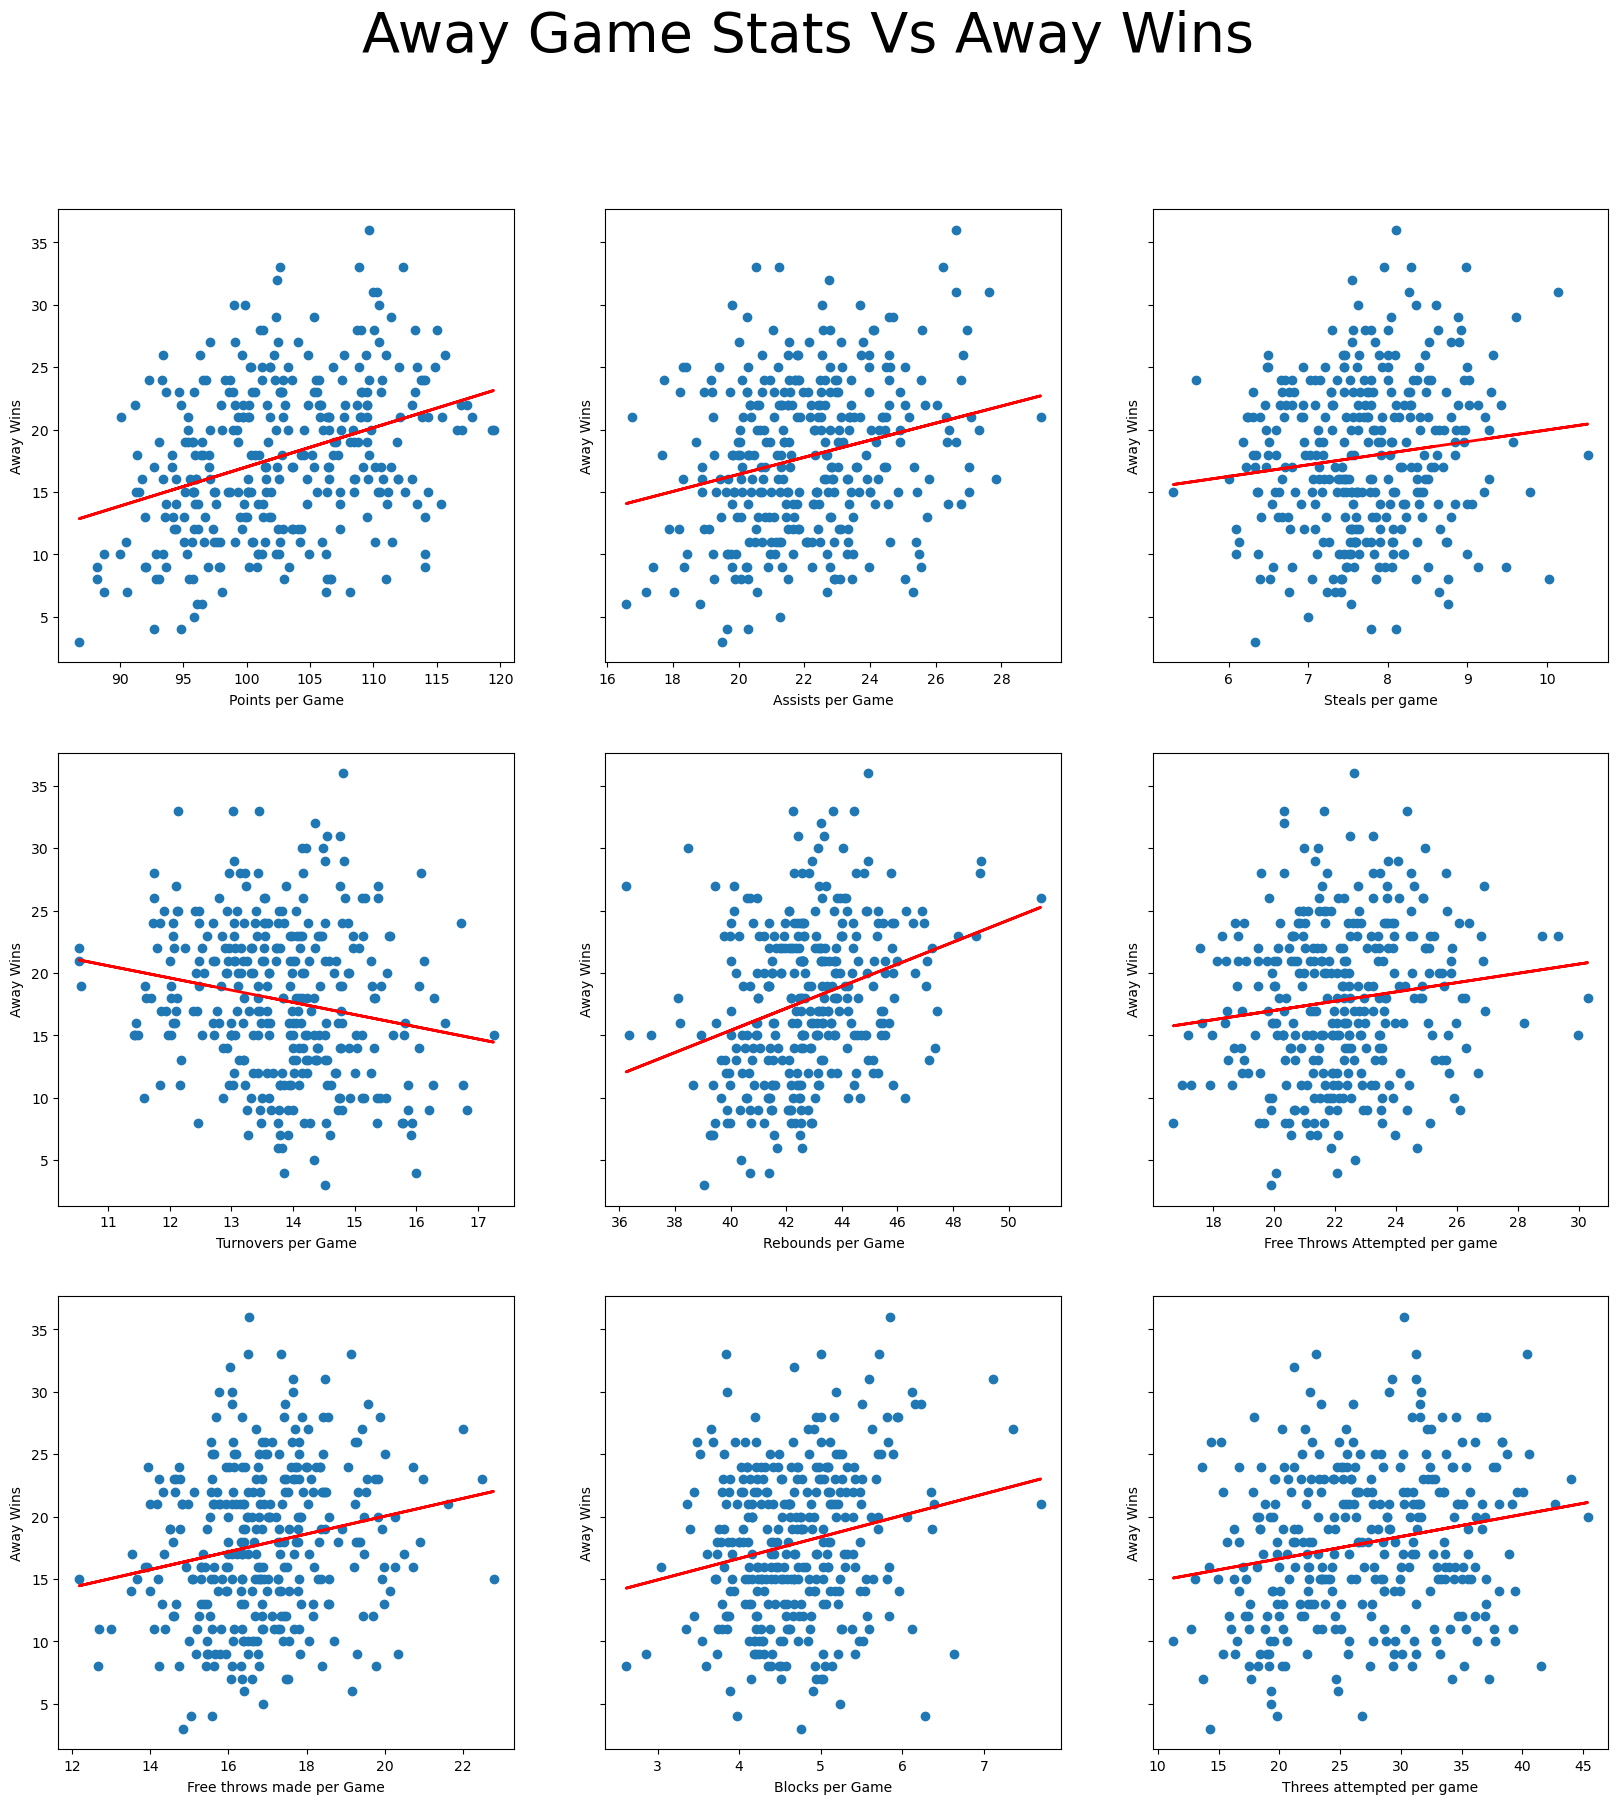

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def getRand(n):
    return np.random.normal(scale=10, size=n)

f = plt.figure(figsize=(20, 20))
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=False, sharey = True,figsize=(20, 20))
a, b = np.polyfit(away_combined_df["PTS"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)
PPG = axes[0][0].scatter(away_combined_df["PTS"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[0][0].plot(away_combined_df["PTS"]/away_combined_df["Regular_season"], a*(away_combined_df["PTS"]/away_combined_df["Regular_season"])+b, color='Red', linewidth=2)

d, r = np.polyfit(away_combined_df["AST"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

APG = axes[0][1].scatter(away_combined_df["AST"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[0][1].plot(away_combined_df["AST"]/away_combined_df["Regular_season"], d*(away_combined_df["AST"]/away_combined_df["Regular_season"])+r, color='Red', linewidth=2)


s, t = np.polyfit(away_combined_df["TOV"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

TPG = axes[1][0].scatter(away_combined_df["TOV"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[1][0].plot(away_combined_df["TOV"]/away_combined_df["Regular_season"], s*(away_combined_df["TOV"]/away_combined_df["Regular_season"])+t, color='Red', linewidth=2)


n, d = np.polyfit(away_combined_df["REB"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

RPG = axes[1][1].scatter(away_combined_df["REB"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[1][1].plot(away_combined_df["REB"]/away_combined_df["Regular_season"], n*(away_combined_df["REB"]/away_combined_df["Regular_season"])+d, color='Red', linewidth=2)



l, q = np.polyfit(away_combined_df["FTM"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

FTM = axes[2][0].scatter(away_combined_df["FTM"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[2][0].plot(away_combined_df["FTM"]/away_combined_df["Regular_season"], l*(away_combined_df["FTM"]/away_combined_df["Regular_season"])+q, color='Red', linewidth=2)



w, t = np.polyfit(away_combined_df["BLK"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

BLK = axes[2][1].scatter(away_combined_df["BLK"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[2][1].plot(away_combined_df["BLK"]/away_combined_df["Regular_season"], w*(away_combined_df["BLK"]/away_combined_df["Regular_season"])+t, color='Red', linewidth=2)

ww, tt = np.polyfit(away_combined_df["FG3A"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

FG3A = axes[2][2].scatter(away_combined_df["FG3A"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[2][2].plot(away_combined_df["FG3A"]/away_combined_df["Regular_season"], ww*(away_combined_df["FG3A"]/away_combined_df["Regular_season"])+tt, color='Red', linewidth=2)


www, ttt = np.polyfit(away_combined_df["FTA"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

FTA = axes[1][2].scatter(away_combined_df["FTA"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[1][2].plot(away_combined_df["FTA"]/away_combined_df["Regular_season"], www*(away_combined_df["FTA"]/away_combined_df["Regular_season"])+ttt, color='Red', linewidth=2)

w2, t2 = np.polyfit(away_combined_df["STL"]/away_combined_df["Regular_season"],away_combined_df["win"], 1)

STL = axes[0][2].scatter(away_combined_df["STL"]/away_combined_df["Regular_season"],away_combined_df["win"])
axes[0][2].plot(away_combined_df["STL"]/away_combined_df["Regular_season"], w2*(away_combined_df["STL"]/away_combined_df["Regular_season"])+t2, color='Red', linewidth=2)



axes[0][0].set_xlabel('Points per Game', labelpad = 5)
axes[0][1].set_xlabel('Assists per Game', labelpad = 5)
axes[1][0].set_xlabel('Turnovers per Game', labelpad = 5)
axes[1][1].set_xlabel('Rebounds per Game', labelpad = 5)
axes[2][0].set_xlabel('Free throws made per Game', labelpad = 5)
axes[2][1].set_xlabel('Blocks per Game', labelpad = 5)
axes[1][2].set_xlabel('Free Throws Attempted per game', labelpad = 5)
axes[2][2].set_xlabel('Threes attempted per game', labelpad = 5)
axes[0][2].set_xlabel('Steals per game', labelpad = 5)


axes[0][0].set_ylabel('Away Wins', labelpad = 5)
axes[0][1].set_ylabel('Away Wins', labelpad = 5)
axes[1][0].set_ylabel('Away Wins', labelpad = 5)
axes[1][1].set_ylabel('Away Wins', labelpad = 5)
axes[2][0].set_ylabel('Away Wins', labelpad = 5)
axes[2][1].set_ylabel('Away Wins', labelpad = 5)
axes[1][2].set_ylabel('Away Wins', labelpad = 5)
axes[2][2].set_ylabel('Away Wins', labelpad = 5)
axes[0][2].set_ylabel('Away Wins', labelpad = 5)


plt.suptitle('Away Game Stats Vs Away Wins',fontsize=40)
plt.show()


In [18]:
home_combined_df["diff"] = home_combined_df["win"]/home_combined_df["Regular_season"]

In [19]:
away_combined_df["diff"] = away_combined_df["win"]/away_combined_df["Regular_season"]

Text(0.5, 1.0, 'Win Percentage at Home vs Away')

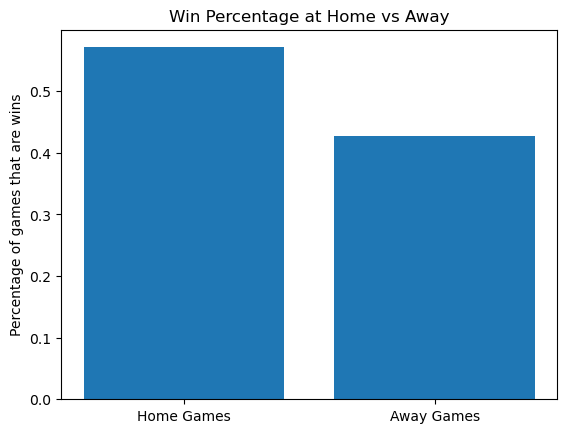

In [20]:
val_home = np.mean(home_combined_df["diff"])
val_away = np.mean(away_combined_df["diff"])
plt.bar(x=["Home Games","Away Games"], height=[val_home,val_away])
plt.ylabel("Percentage of games that are wins")
plt.title("Win Percentage at Home vs Away")

In [21]:
home_combined_df["Home Win Percentage"] = home_combined_df["diff"]
away_combined_df["Away Win Percentage"] = away_combined_df["diff"]

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Win Percentage Distribution')

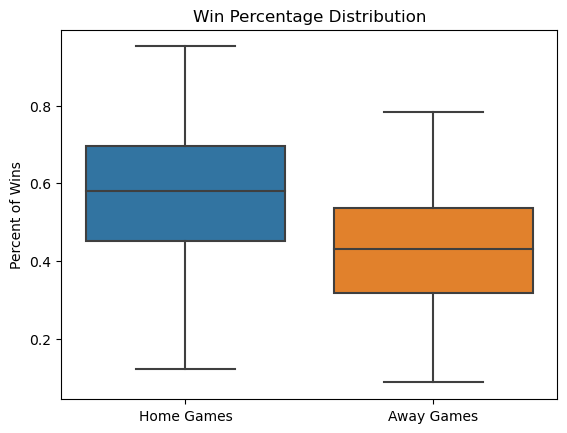

In [22]:
import seaborn as sns
ax = sns.boxplot(data=[home_combined_df["Home Win Percentage"], away_combined_df["Away Win Percentage"]])
ax.set_xticklabels(["Home Games","Away Games"])
ax.set_ylabel("Percent of Wins")
plt.title("Win Percentage Distribution")

<AxesSubplot:>

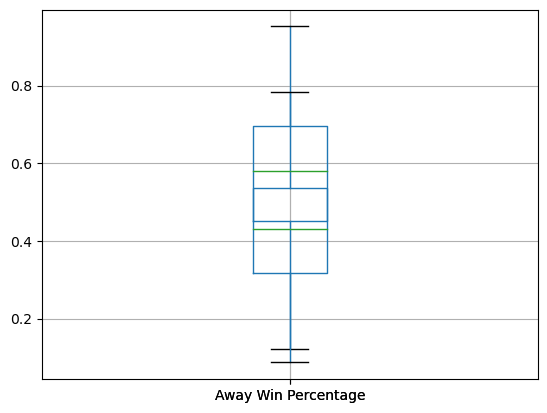

In [23]:
home_combined_df.boxplot(column="Home Win Percentage")
away_combined_df.boxplot(column="Away Win Percentage")


## Explination:
### Above are the characteristics that relate to teams winning games. Therefore if we want to create a GLM, we must keep these features in mind.

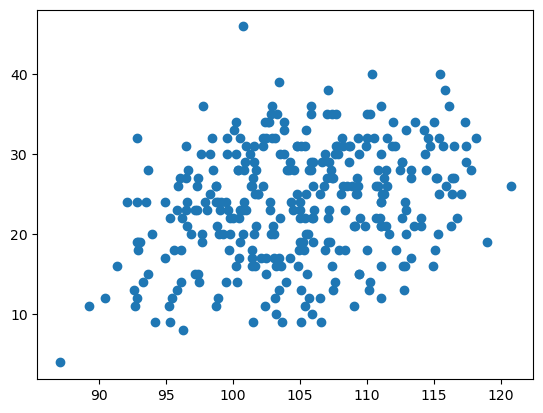

In [24]:
plt.scatter(home_combined_df["PTS"]/home_combined_df["Regular_season"],home_combined_df["win"])

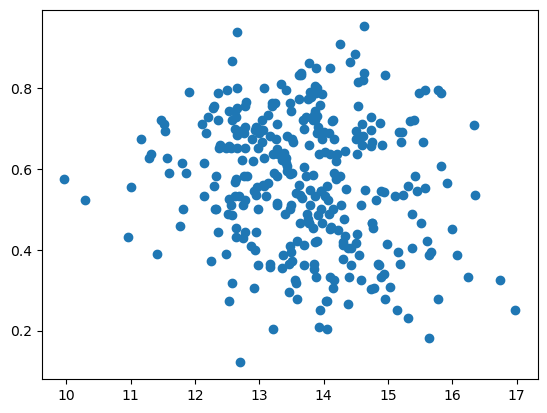

In [25]:
plt.scatter(home_combined_df["TOV"]/home_combined_df["Regular_season"],home_combined_df["win"]/home_combined_df["Regular_season"])

## Below I create the distribution that we will be bootstrapping from

### Basically just take the home and away win percentages and combine them into the same distribution. This work because our null is that there is no difference between 

In [26]:
combined_populaton = pd.DataFrame(columns = (["Home Win","Away Win"]))
combined_populaton


,Home Win,Away Win


In [27]:
combined_populaton["Home Win"]= home_combined_df["Home Win Percentage"]
combined_populaton["Away Win"] = away_combined_df["Away Win Percentage"]

In [28]:
combined_populaton

,Home Win,Away Win
0,0.696970,0.515152
1,0.581395,0.477273
2,0.545455,0.348837
3,0.833333,0.586957
4,0.666667,0.500000
...,...,...
325,0.500000,0.400000
326,0.613636,0.348837
327,0.303030,0.394737
328,0.500000,0.416667


### For simplicity I stack them

In [29]:
empty = []
combine_array = pd.concat([combined_populaton["Home Win"], combined_populaton["Away Win"]], axis = 0)

In [30]:
the_stacked_df = pd.DataFrame(combine_array)

Text(0.5, 0, 'Proportion of games won')

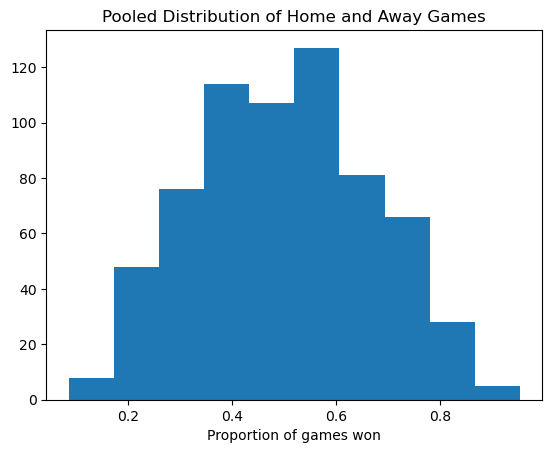

In [31]:
plt.hist(the_stacked_df)
plt.title("Pooled Distribution of Home and Away Games")
plt.xlabel("Proportion of games won")

## Above is the distribution we will be sampling from in order to mimic the distribution of the null Hypothesis. 

#### The process:
1) Take two samples of equal sizes  from this population above (where the population contains the percentage of away wins and the percentage of home wins) and calculate the test statistic (percentage of wins at home vs percentage of wins way)

2) Repeat this many times

3) Now we have a histogram with the test statistics. 


The parameters:
1)  330 size sample representing home wins. 330 Size Sample representing away wins. Total is 660 points like the population.
    
    
   - This is because this was the size of our accessible population, so if we have the entire data set we can just    bootstrap it (sample with replacement).

2) We'll repeat this 10k times to have a sufficiently large data set. 

3) Test statistic is the average difference in proportion of wins for home and away games


In [32]:
def the_bootstrap(the_pop,replications=10000):
    tracker = []
    for i in range(replications):
        away_represented = the_pop.sample(330,replace=True)
        home_represented = the_pop.sample(330,replace=True)
        test_statistic = np.mean(home_represented - away_represented)[0]
        tracker.append(test_statistic)
    return tracker


In [33]:
the_strap = the_bootstrap(the_stacked_df)

### Now I collect the observed statistic for each team.

In [34]:
the_process["ATL"][1]

,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,win,Regular_season
SEASON_ID,,,,,,,,,,,,,,,,,,,,,
22011,53150220321,8035,3105,1204,2658,14.946,250,680,12.144,447,...,1006,1320,712,283.0,145,448,590,66.0,17,33
22012,70866960428,10485,4195,1610,3513,20.171,359,975,16.095,616,...,1366,1761,1017,358.0,203,639,826,-8.6,21,44
22013,69256347691,10323,4305,1615,3501,19.891,406,1113,15.621,669,...,1293,1674,1032,363.0,175,650,862,-115.0,15,43
22014,74088185902,10912,4557,1678,3714,20.815,433,1173,17.045,768,...,1417,1815,1064,409.0,223,639,891,96.0,27,46
22015,70866960428,10482,4407,1626,3661,19.529,416,1217,14.954,739,...,1469,1856,1031,397.0,241,659,859,41.0,22,44
22016,72477573165,10672,4436,1639,3675,20.071,399,1165,15.339,759,...,1552,1980,995,362.0,224,700,806,-61.6,23,45
22017,69256347691,10261,4339,1612,3685,18.834,451,1271,15.282,664,...,1403,1816,931,353.0,180,663,852,-257.4,10,43
22018,75698798639,11058,5096,1859,4186,20.930,587,1668,16.570,791,...,1526,2089,1112,433.0,212,811,1059,-363.2,15,47
22019,57982058532,8584,3826,1383,3193,15.609,431,1342,11.561,629,...,1151,1496,817,311.0,178,573,815,-435.0,7,36


In [35]:
### A function to subtract the mean proportion of wins at home minus the mean proportion of wins away

def find_per(df_home,df_away):
    mean_home = np.mean(df_home["win"]/df_home["Regular_season"])
    mean_away = np.mean(df_away["win"]/df_away["Regular_season"])
    return mean_home - mean_away

observed = {}
for i in the_process:
    ### store it as {the_team:the_diff,the_team:the_diff}
    observed[i]=find_per(the_process[i][0],the_process[i][1])
    

    

#### Visualizing our observed statistics vs our bootstrap distribution

In [37]:
!pip install distinctipy


  Using cached distinctipy-1.2.2-py3-none-any.whl (25 kB)


In [38]:
from distinctipy import distinctipy

# number of colours to generate
N = 30

# generate N visually distinct colours
colors = distinctipy.get_colors(N)

# display the colours
import random

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)

plt.hist(the_strap,density=True)
plt.xlabel("Average Proportion of wins at home - Average Proportion of wins away")
used = []
key_list = [i for i in observed.keys()]
for i in range(len(observed)):
    color = random.randint(0,26)
    plt.axvline(x = observed[key_list[i]], ymax = 1,label = key_list[i],c =colors[i],alpha=.7)
plt.legend()

counter=0
for x,y in zip(observed.values(),np.linspace(25,39,30)):
    label = key_list[counter]
    counter+=1

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',rotation=90) # horizontal alignment can be left, right or center
    
plt.show()


In [40]:
significant ={}
key_list = [i for i in observed.keys()]
for i in key_list:
    number_more = [w for w in the_strap if w>observed[i]]
    number_less = [w for w in the_strap if w<observed[i]]
    if len(number_more)/len(the_strap) < .05 or len(number_less)/len(the_strap) < .05:
        significant[i]= str(len(number_more)/len(the_strap))
    else:
        significant[i]='Not significant'
        
significant   

{'ATL': '0.0',
 'BOS': '0.0',
 'CLE': '0.0',
 'NOP': '0.0',
 'CHI': '0.0',
 'DAL': '0.0',
 'DEN': '0.0',
 'GSW': '0.0',
 'HOU': '0.0',
 'LAC': '0.0',
 'LAL': '0.0',
 'MIA': '0.0',
 'MIL': '0.0',
 'MIN': '0.0',
 'BKN': '0.0',
 'NYK': '0.0',
 'ORL': '0.0',
 'IND': '0.0',
 'PHI': '0.0',
 'PHX': '0.0',
 'POR': '0.0',
 'SAC': '0.0',
 'SAS': '0.0',
 'OKC': '0.0',
 'TOR': '0.0',
 'UTA': '0.0',
 'MEM': '0.0',
 'WAS': '0.0',
 'DET': '0.0',
 'CHA': '0.0'}

### Immediately it's apparent that every single NBA team has a statistically significant result.

We can conclude that the mean difference between the proportion of wins at home and away are statisatically significant for each team, with a P-value of 0. Because neither the bonferonni nor the B-H procedure will give us a p-value cutoff below 0, we know that every single result will be significant (with a p-value below cuttoff).

### Statistically signifcant factors.

Since we're not controlling for which players are playing, we cannot directly create a cause and effect relationship between certain game factors and wins.

What we can do is analyze which factors differ between home and away at a statistically signifcant level in order to gain some context as to why home games might be won more. 

For example if it is found that the difference between steals at home and steals away is not due to chance, then this may have some association with why teams tend to win more at home. 

* This doesnt imply causation but adds more context and a shortlist of variables that could be linked through causation.
    
* This also gives us an idea about what variables we can use to predict home and away win proportions.

### Shortlisting features

The Variables we'll be looking at come from the association charts above:

1) Points per game.

2) Assists per game. 

3) Steals per game. 

4) Rebounds per game.

5) Turnovers per game.

6) Threes attempted per game.

7) Free throws made per game. 

### Defining automating functions

In [41]:
## A function that generates our pop

def create_pop(the_stat):
    combined_populaton = pd.DataFrame(columns = (["Home"+" "+the_stat,"Away"+" "+the_stat]))
    combined_populaton["Home"+" "+the_stat]= home_combined_df[the_stat]/home_combined_df["Regular_season"]
    combined_populaton["Away"+" "+the_stat] = away_combined_df[the_stat]/away_combined_df["Regular_season"]
    empty = []
    combine_array = pd.concat([combined_populaton["Home"+" "+the_stat], combined_populaton["Away"+" "+the_stat]], axis = 0)
    the_stacked_df = pd.DataFrame(combine_array)
    return the_stacked_df

In [42]:
## A function to bootstrap 
def the_bootstrap(the_pop,replications=10000):
    tracker = []
    for i in range(replications):
        away_represented = np.mean(the_pop.sample(330,replace=True))
        home_represented = np.mean(the_pop.sample(330,replace=True))
        test_statistic = home_represented[0] - away_represented[0]
        tracker.append(test_statistic)
    return tracker


In [43]:
## A function that finds the observed per for any variable

def find_per(the_stat):
    observed = {}
    for i in the_process:
    ### store it as {the_team:the_diff,the_team:the_diff}
        mean_home = np.mean(the_process[i][0][the_stat]/the_process[i][0]["Regular_season"])
        mean_away = np.mean(the_process[i][1][the_stat]/the_process[i][1]["Regular_season"])
        observed[i]=mean_home-mean_away
    
    return observed



    
the_points = find_per("PTS") 

In [44]:
### Visualizing results
def visualize(observed_stats,booter,stat_name):

    plt.figure(figsize=(15, 15), dpi=80)

    plt.hist(booter,density=True)
    plt.xlabel("Average "+stat_name+" at home"+" vs away")
    used = []
    key_list = [i for i in observed_stats.keys()]
    for i in range(len(observed_stats)):
        color = random.randint(0,26)
        plt.axvline(x = observed_stats[key_list[i]], ymax = 1,label = key_list[i],c =colors[i],alpha=.7)
    plt.legend(loc='upper right')

    counter=0
    for x,y in zip(observed_stats.values(),np.linspace(25,39,30)):
        label = key_list[counter]
        counter+=1

        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',rotation=90) # horizontal alignment can be left, right or center

    return plt.show()


In [45]:
def signif(our_strap,the_observed): 
    significant ={}
    numeri = {}
    key_list = [i for i in the_observed.keys()]
    for i in key_list:
        number_more = [w for w in our_strap if w>=the_observed[i]]
        number_less = [w for w in our_strap if w<=the_observed[i]]
        if len(number_more)/len(our_strap) < .05:
            significant[i]= str(len(number_more)/len(our_strap))
            numeri[i]=len(number_more)/len(our_strap)
            
        elif len(number_less)/len(our_strap) < .05:
            significant[i]= str(len(number_less)/len(our_strap))
            numeri[i]=len(number_less)/len(our_strap)
        else:
            if the_observed[i]>=0:
                significant[i]=str(len(number_more)/len(our_strap))+' Not significant'
                numeri[i]=len(number_more)/len(our_strap)
            else:
    
                significant[i]=str(len(number_less)/len(our_strap))+' Not significant'
                numeri[i]=len(number_less)/len(our_strap)
                

    return [significant,numeri]   

### Points per game

In [46]:
create_pop("PTS")


,0
0,99.090909
1,98.348837
2,99.500000
3,102.880952
4,101.288889
...,...
325,104.533333
326,107.348837
327,97.500000
328,110.527778


In [47]:
points_pop = create_pop("PTS")
ballsohard = the_bootstrap(points_pop)


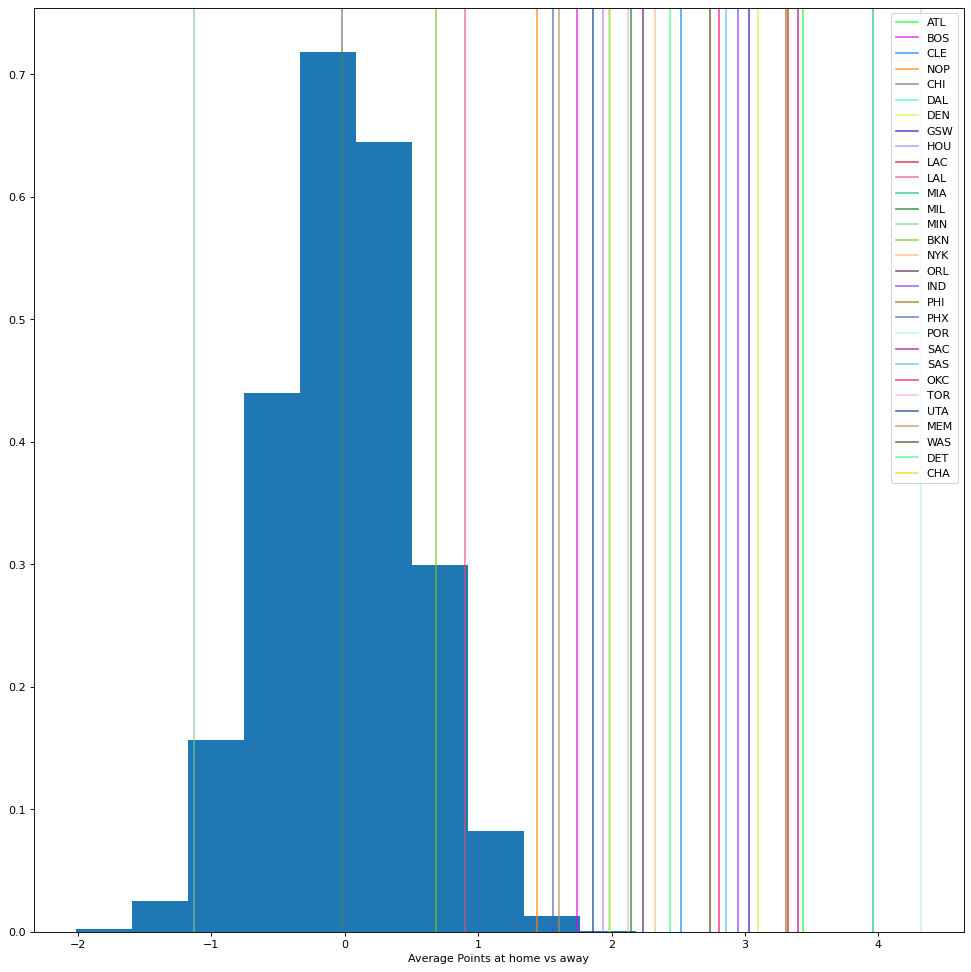

In [48]:
visualize(the_points,ballsohard, "Points")


In [49]:
the_p_values = signif(ballsohard,the_points)[0]
the_p_values

{'ATL': '0.0',
 'BOS': '0.0004',
 'CLE': '0.0',
 'NOP': '0.0032',
 'CHI': '0.4851 Not significant',
 'DAL': '0.0001',
 'DEN': '0.0',
 'GSW': '0.0',
 'HOU': '0.0001',
 'LAC': '0.0',
 'LAL': '0.0442',
 'MIA': '0.0',
 'MIL': '0.0001',
 'MIN': '0.0136',
 'BKN': '0.0954 Not significant',
 'NYK': '0.0',
 'ORL': '0.0',
 'IND': '0.0',
 'PHI': '0.0',
 'PHX': '0.0014',
 'POR': '0.0',
 'SAC': '0.0',
 'SAS': '0.0',
 'OKC': '0.0',
 'TOR': '0.0001',
 'UTA': '0.0002',
 'MEM': '0.0011',
 'WAS': '0.0',
 'DET': '0.0',
 'CHA': '0.0001'}

Before using correction methods, only Chicago and brooklyn are not significant, makes sense because they were one of the teams closest to having non significant results for home and away wins. 

- If most other teams score more at home than away, and the bulls score the same at home and away.

- Interestingly enough, Minnesota scores less points per game at home than away on average. Since they win more at home, then their defense at home must be better than away!

## Bonferonni and B-H for Points per game

In [50]:
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    the_data = pd.DataFrame({"p_vals":p_values})
    the_data["k"] = the_data["p_vals"].rank()
    the_amount = the_data["k"]*alpha/ len(the_data["p_vals"])
    the_data["the_amount"]=the_amount
    filtered = max(the_data[the_data["the_amount"]>the_data["p_vals"]]["k"])
    new_amount = filtered*alpha/ len(the_data["k"])
    decisions = [the_data["p_vals"][i] <=new_amount for i in np.arange(len(p_values) )] 
    return decisions

In [51]:
def viz_bh(the_data_p_val):
    
    the_data_one = [i for i in the_data_p_val]

    the_data = pd.DataFrame(the_data_one).rename(columns={0:"p_val"})
    the_data["k"] = the_data["p_val"].rank(method='first')
    the_amount = the_data["k"]*.05/ len(the_data["p_val"])
    the_data["the_amount"]=the_amount
    new_amount = the_data["k"]*.05/ len(the_data["k"])

    sns.scatterplot(x=the_data["k"], y=the_data["p_val"],color = 'black');
    plt.plot(the_data["k"],new_amount, label='B-H guide', color='red')
    plt.title("B-H")
    plt.legend();
    return the_data.head()
    

,p_val,k,the_amount
0,0.0000,1.0,0.001667
1,0.0004,23.0,0.038333
2,0.0000,2.0,0.003333
3,0.0032,26.0,0.043333
4,0.4851,30.0,0.050000


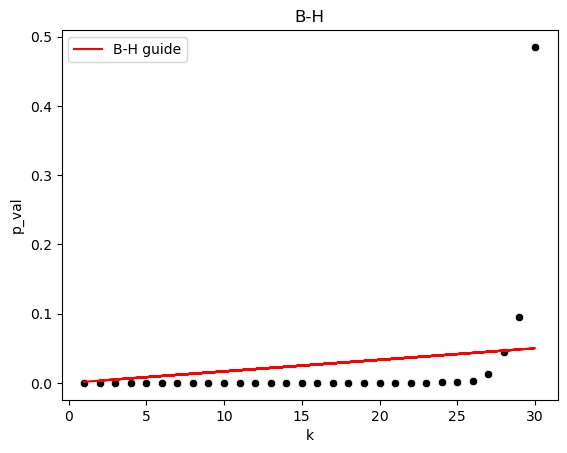

In [52]:
viz_bh(signif(ballsohard,the_points)[1].values())

In [53]:
"Even after B-H we make "+ str(sum(benjamini_hochberg(signif(ballsohard,the_points)[1].values(),.05)))+" Discoveries"

'Even after B-H we make 28 Discoveries'

Under Bonferonni we'll make only 26 discoveries

### Bonferonni 

We make the same number of discoveries even under the Bonferonni threshold of .0016 

### Assists per game 

In [54]:
ass_pop = create_pop("AST")
ballsohard_as = the_bootstrap(ass_pop)


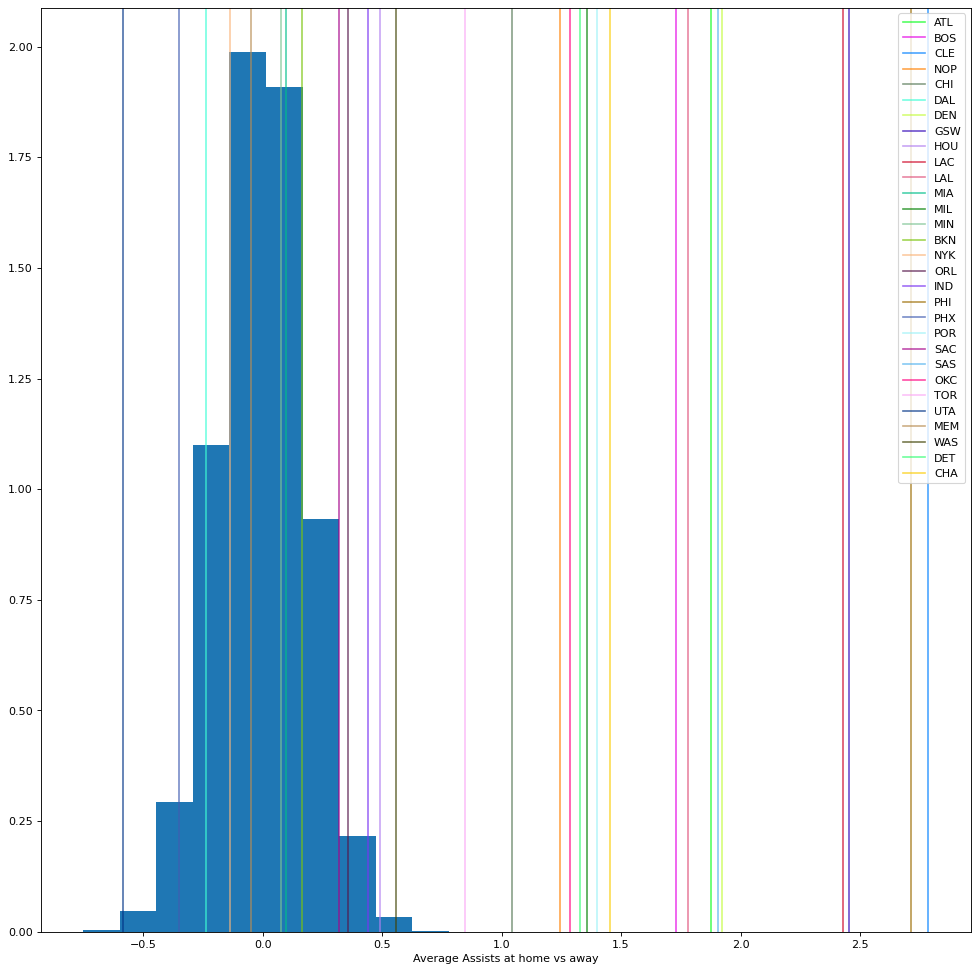

In [55]:
obs_ast = find_per("AST")
visualize(obs_ast,ballsohard_as, "Assists")

In [56]:
signif(ballsohard_as,obs_ast)[0]

{'ATL': '0.0',
 'BOS': '0.0',
 'CLE': '0.0',
 'NOP': '0.0',
 'CHI': '0.0',
 'DAL': '0.0984 Not significant',
 'DEN': '0.0',
 'GSW': '0.0',
 'HOU': '0.0039',
 'LAC': '0.0',
 'LAL': '0.0',
 'MIA': '0.2956 Not significant',
 'MIL': '0.0',
 'MIN': '0.3366 Not significant',
 'BKN': '0.185 Not significant',
 'NYK': '0.2249 Not significant',
 'ORL': '0.0227',
 'IND': '0.008',
 'PHI': '0.0',
 'PHX': '0.027',
 'POR': '0.0',
 'SAC': '0.0384',
 'SAS': '0.0',
 'OKC': '0.0',
 'TOR': '0.0',
 'UTA': '0.0009',
 'MEM': '0.3906 Not significant',
 'WAS': '0.0011',
 'DET': '0.0',
 'CHA': '0.0'}

,p_val,k,the_amount
0,0.0,1.0,0.001667
1,0.0,2.0,0.003333
2,0.0,3.0,0.005000
3,0.0,4.0,0.006667
4,0.0,5.0,0.008333


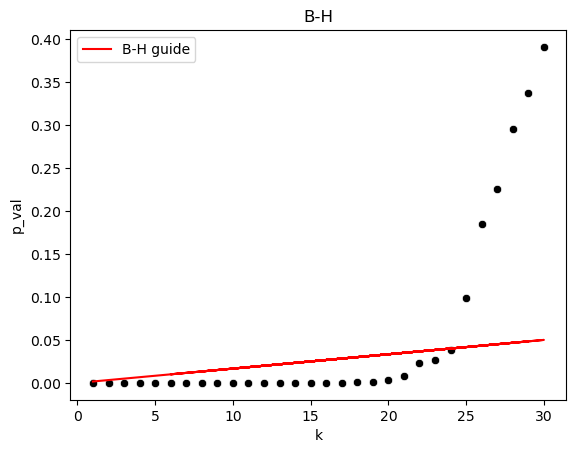

In [57]:
viz_bh(signif(ballsohard_as,obs_ast)[1].values())

In [58]:
signif(ballsohard,obs_ast)[0]

{'ATL': '0.0002',
 'BOS': '0.0005',
 'CLE': '0.0',
 'NOP': '0.0096',
 'CHI': '0.0244',
 'DAL': '0.3266 Not significant',
 'DEN': '0.0001',
 'GSW': '0.0',
 'HOU': '0.1729 Not significant',
 'LAC': '0.0',
 'LAL': '0.0003',
 'MIA': '0.4273 Not significant',
 'MIL': '0.0054',
 'MIN': '0.4423 Not significant',
 'BKN': '0.3776 Not significant',
 'NYK': '0.3953 Not significant',
 'ORL': '0.2477 Not significant',
 'IND': '0.1973 Not significant',
 'PHI': '0.0',
 'PHX': '0.2529 Not significant',
 'POR': '0.004',
 'SAC': '0.2705 Not significant',
 'SAS': '0.0001',
 'OKC': '0.0079',
 'TOR': '0.0539 Not significant',
 'UTA': '0.1361 Not significant',
 'MEM': '0.4637 Not significant',
 'WAS': '0.1423 Not significant',
 'DET': '0.0063',
 'CHA': '0.0028'}

Bonferonni threshold of 0.001666666667 , will mean we make one less discovery with DAL being above the threshold. 

This controls the probability of making one false positive across all teams. -- More strict than BH

B-H controls false discovery rate, which is the probability of a non discovery out of the discovery points. 

### Rebounds 

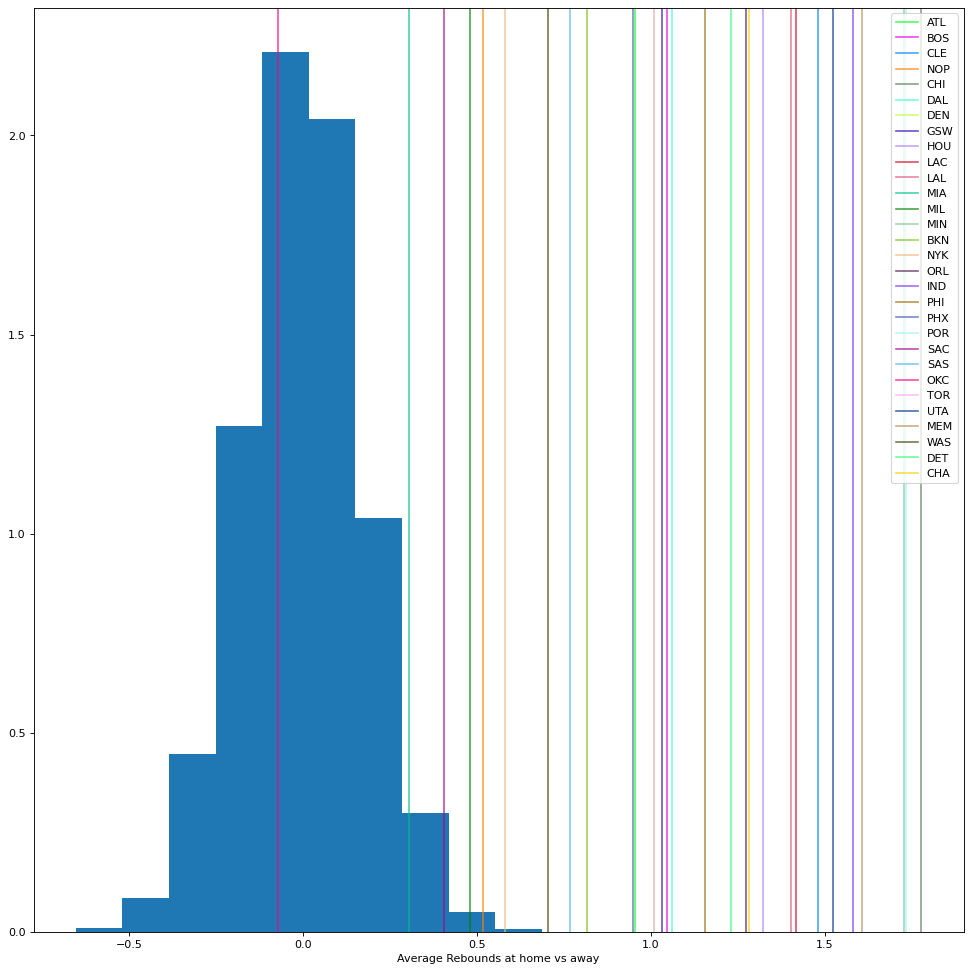

In [59]:
reb_pop = create_pop("REB")
ballsohard = the_bootstrap(reb_pop)
obs_reb = find_per("REB")
visualize(obs_reb,ballsohard, "Rebounds")

In [60]:
signif(ballsohard,obs_reb)[0]

{'ATL': '0.0',
 'BOS': '0.0',
 'CLE': '0.0',
 'NOP': '0.0014',
 'CHI': '0.0',
 'DAL': '0.0',
 'DEN': '0.0',
 'GSW': '0.0',
 'HOU': '0.0',
 'LAC': '0.0',
 'LAL': '0.0',
 'MIA': '0.0358',
 'MIL': '0.0033',
 'MIN': '0.0',
 'BKN': '0.0',
 'NYK': '0.0007',
 'ORL': '0.0',
 'IND': '0.0',
 'PHI': '0.0',
 'PHX': '0.0',
 'POR': '0.0',
 'SAC': '0.0093',
 'SAS': '0.0',
 'OKC': '0.3352 Not significant',
 'TOR': '0.0',
 'UTA': '0.0',
 'MEM': '0.0',
 'WAS': '0.0',
 'DET': '0.0',
 'CHA': '0.0'}

,p_val,k,the_amount
0,0.0000,1.0,0.001667
1,0.0000,2.0,0.003333
2,0.0000,3.0,0.005000
3,0.0014,26.0,0.043333
4,0.0000,4.0,0.006667


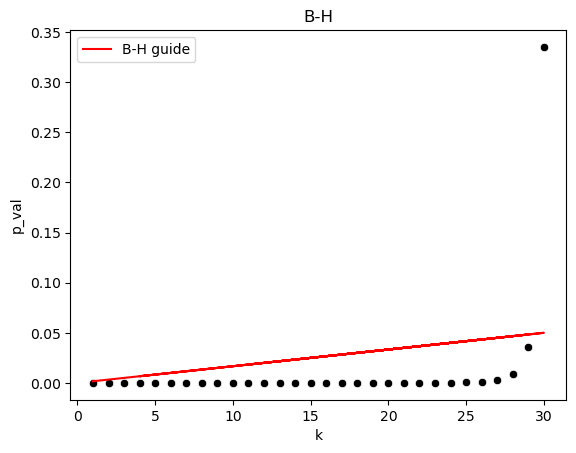

In [61]:
viz_bh(signif(ballsohard,obs_reb)[1].values())

After bonferonni we make 3 less discoveries.

## Overall for the 'big three' offensive stats:

1) Points do differ between home and away teams for all but two teams. 
* This is probably the biggest driver as to why home teams win more. 

2) For about 5 teams assists per  do not differ between home and away. 
* The least important in predicting the number of home wins a team has. 

3) All but 4 team have differing home and away rebounds. 

## Some defensive stats

### Steals per game

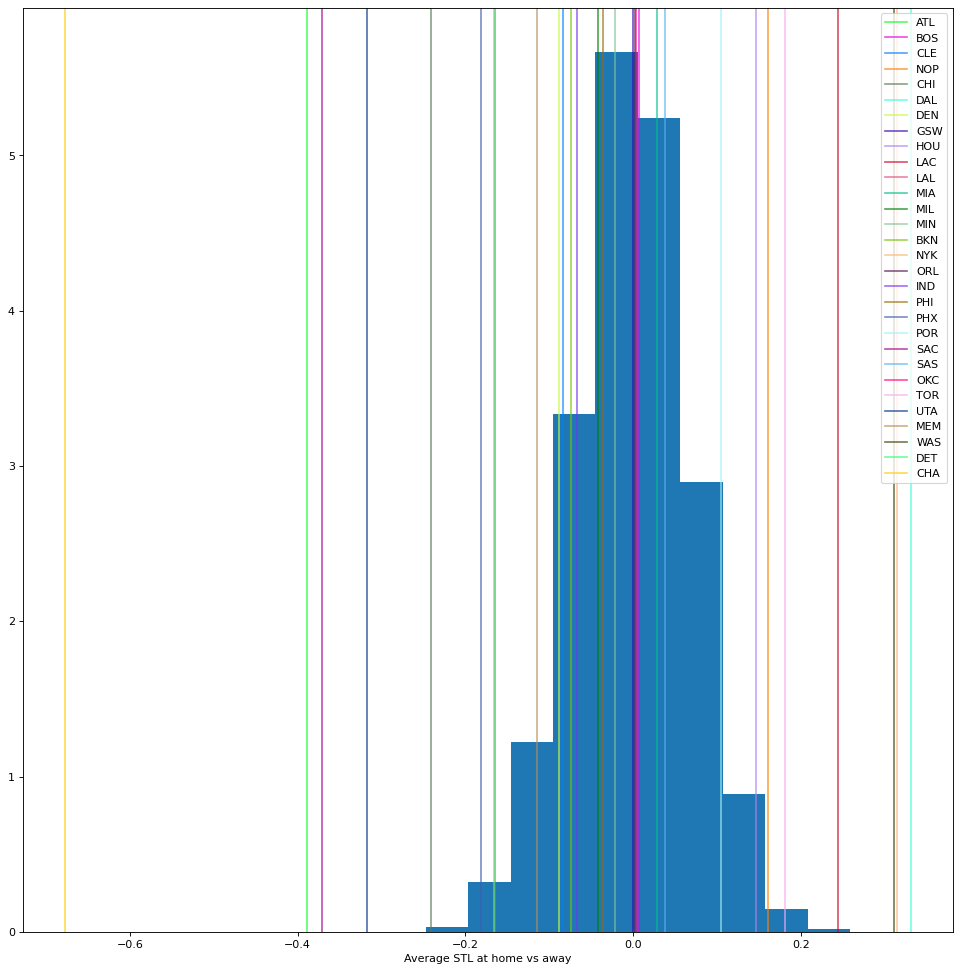

In [73]:
stl_pop = create_pop("STL")
ballsohard = the_bootstrap(stl_pop)
obs_stl = find_per("STL")
visualize(obs_stl,ballsohard, "STL")

,p_val,k,the_amount
0,0.0000,1.0,0.001667
1,0.4544,27.0,0.045000
2,0.1096,19.0,0.031667
3,0.0073,13.0,0.021667
4,0.0001,8.0,0.013333


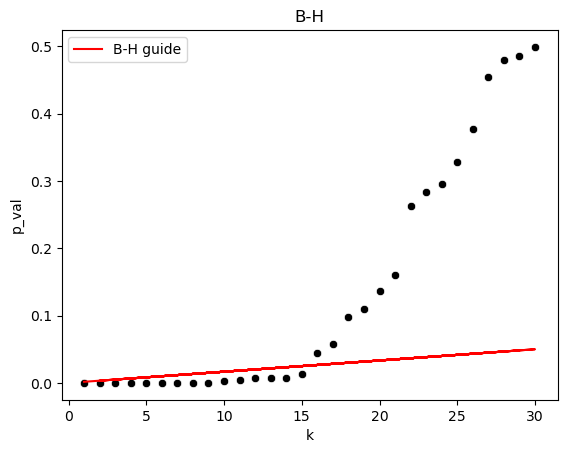

In [75]:
viz_bh(signif(ballsohard,obs_stl)[1].values())

In [76]:
signif(ballsohard,obs_stl)[0]

{'ATL': '0.0',
 'BOS': '0.4544 Not significant',
 'CLE': '0.1096 Not significant',
 'NOP': '0.0073',
 'CHI': '0.0001',
 'DAL': '0.0',
 'DEN': '0.0984 Not significant',
 'GSW': '0.499 Not significant',
 'HOU': '0.013',
 'LAC': '0.0002',
 'LAL': '0.0074',
 'MIA': '0.3282 Not significant',
 'MIL': '0.263 Not significant',
 'MIN': '0.377 Not significant',
 'BKN': '0.137 Not significant',
 'NYK': '0.0',
 'ORL': '0.4856 Not significant',
 'IND': '0.161 Not significant',
 'PHI': '0.2953 Not significant',
 'PHX': '0.0043',
 'POR': '0.0571 Not significant',
 'SAC': '0.0',
 'SAS': '0.2839 Not significant',
 'OKC': '0.4798 Not significant',
 'TOR': '0.0027',
 'UTA': '0.0',
 'MEM': '0.0447',
 'WAS': '0.0',
 'DET': '0.0069',
 'CHA': '0.0'}

With BH we make 15 discoveries. With bonferonni we make 9. 

### Blocks per game

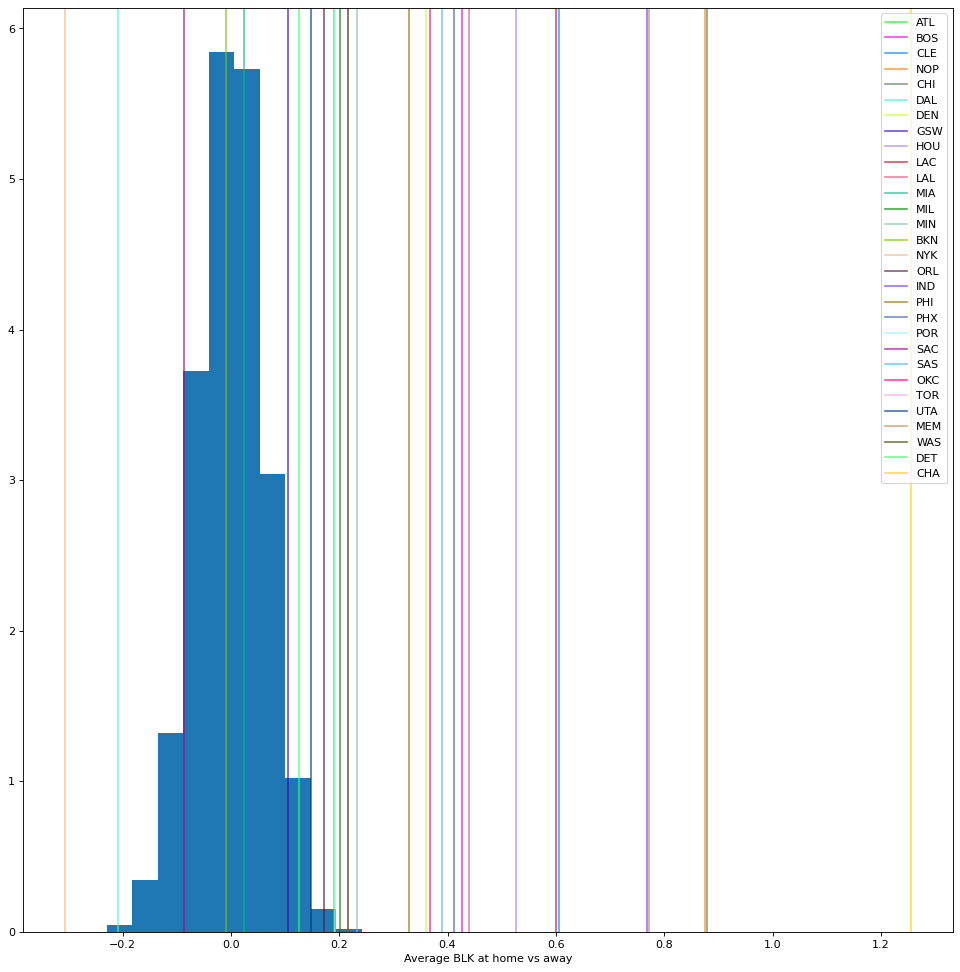

In [77]:
blcks_pop = create_pop("BLK")
ballsohard = the_bootstrap(blcks_pop)
obs_blk = find_per("BLK")
visualize(obs_blk,ballsohard, "BLK")

,p_val,k,the_amount
0,0.001,22.0,0.036667
1,0.000,1.0,0.001667
2,0.000,2.0,0.003333
3,0.000,3.0,0.005000
4,0.000,4.0,0.006667


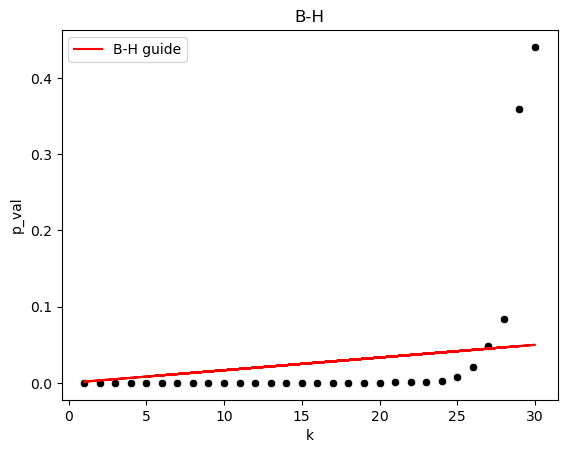

In [79]:
viz_bh(signif(ballsohard,obs_blk)[1].values())

In [81]:
signif(ballsohard,obs_blk)[0]

{'ATL': '0.001',
 'BOS': '0.0',
 'CLE': '0.0',
 'NOP': '0.0',
 'CHI': '0.0',
 'DAL': '0.0004',
 'DEN': '0.0',
 'GSW': '0.0478',
 'HOU': '0.0',
 'LAC': '0.0',
 'LAL': '0.0',
 'MIA': '0.3588 Not significant',
 'MIL': '0.0006',
 'MIN': '0.0001',
 'BKN': '0.4408 Not significant',
 'NYK': '0.0',
 'ORL': '0.0024',
 'IND': '0.0',
 'PHI': '0.0',
 'PHX': '0.0',
 'POR': '0.001',
 'SAC': '0.0842 Not significant',
 'SAS': '0.0',
 'OKC': '0.0',
 'TOR': '0.0003',
 'UTA': '0.0078',
 'MEM': '0.0',
 'WAS': '0.0003',
 'DET': '0.0211',
 'CHA': '0.0'}

We make 28 discoveries under the B-H and 27 under the Bonferonni.

## Suspected largest difference makers

### Freethrows made per game

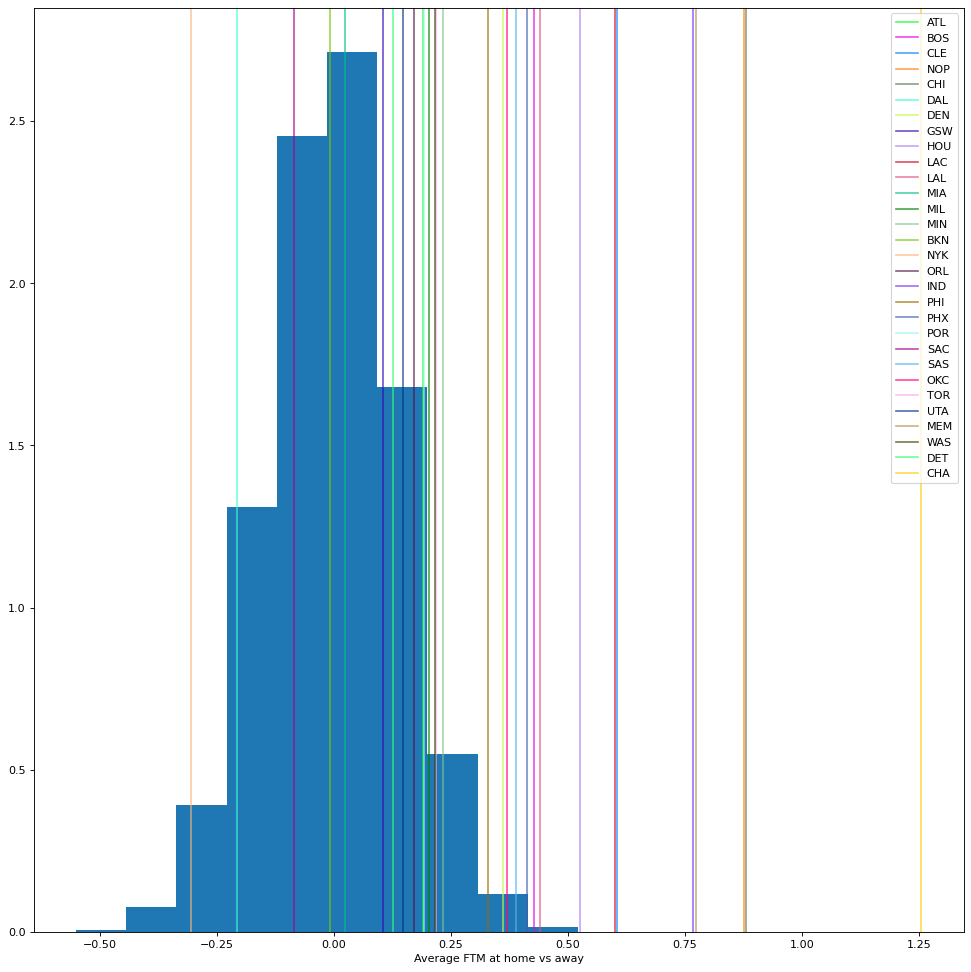

In [82]:
FTM_pop = create_pop("FTM")
ballsohard = the_bootstrap(FTM_pop)
obs_ftm = find_per("FTM")
visualize(obs_blk,ballsohard, "FTM")

In [83]:
signif(ballsohard,obs_ftm)[0]

{'ATL': '0.0',
 'BOS': '0.3918 Not significant',
 'CLE': '0.1165 Not significant',
 'NOP': '0.1561 Not significant',
 'CHI': '0.1987 Not significant',
 'DAL': '0.0',
 'DEN': '0.0',
 'GSW': '0.1476 Not significant',
 'HOU': '0.0',
 'LAC': '0.0002',
 'LAL': '0.2434 Not significant',
 'MIA': '0.0',
 'MIL': '0.0002',
 'MIN': '0.0015',
 'BKN': '0.0212',
 'NYK': '0.0053',
 'ORL': '0.0',
 'IND': '0.0122',
 'PHI': '0.0194',
 'PHX': '0.4551 Not significant',
 'POR': '0.0',
 'SAC': '0.0',
 'SAS': '0.1965 Not significant',
 'OKC': '0.1314 Not significant',
 'TOR': '0.0004',
 'UTA': '0.0',
 'MEM': '0.0',
 'WAS': '0.0',
 'DET': '0.0',
 'CHA': '0.0'}

,p_val,k,the_amount
0,0.0000,1.0,0.001667
1,0.3918,29.0,0.048333
2,0.1165,22.0,0.036667
3,0.1561,25.0,0.041667
4,0.1987,27.0,0.045000


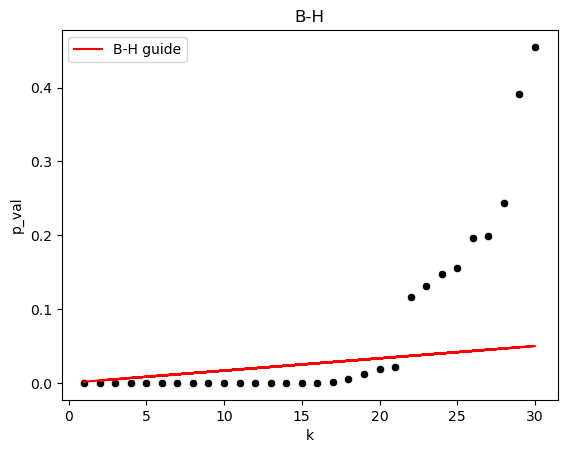

In [84]:
viz_bh(signif(ballsohard,obs_ftm)[1].values())

21 Discoveries under the B-H, 18 under bonferonni.

### Plus_Minus made per game

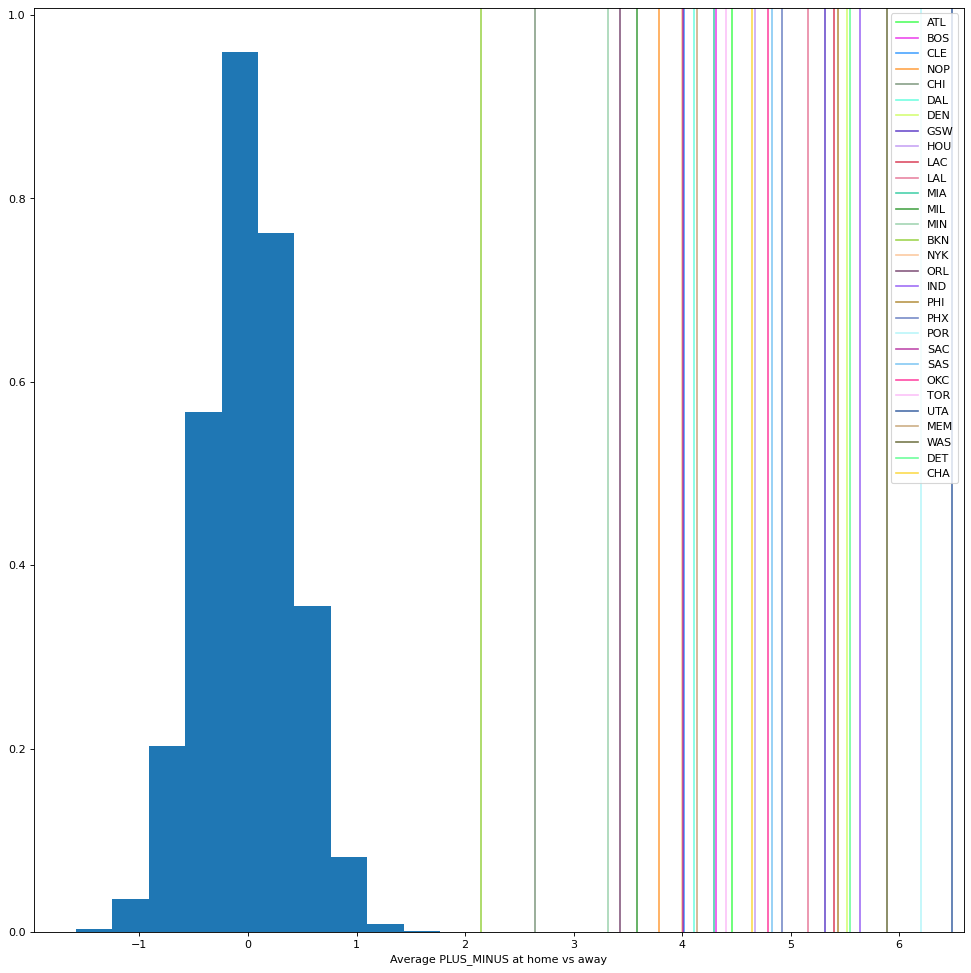

In [85]:
pls_pop = create_pop("PLUS_MINUS")
ballsohard = the_bootstrap(pls_pop)
obs_plus = find_per("PLUS_MINUS")
visualize(obs_plus,ballsohard, "PLUS_MINUS")

### Like points this is highly variable between home and away games... This is the average of plus minus per player on the team divided by the number of games that season.

ALl statistically significant

## Overall:

The following are statistically significant across almost all teams—meaning they differ between home and away not due to chance. These are variables that may have the most impact on proportion of games won at home versus away. 


1) Rebounds Per game 

2) Points Per game

3) Plus Minus Per game 

4) Blocks per game


The following are statistically significant across most teams, however they are statistically significant on less teams.

1) Assists Per game


These are the variables that are statistically significant across the least number of teams. 

1) Free throws made per game

2) Steals per game




### Association between plus minus per game vs proportion of wins at home and away

In [92]:
away_combined_df.columns

Index(['TEAM_ID', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'win', 'Regular_season', 'diff',
       'Away Win Percentage'],
      dtype='object')

In [98]:
away_stats = away_combined_df[["Away Win Percentage","PLUS_MINUS"]]
home_stats = home_combined_df[["Home Win Percentage","PLUS_MINUS"]]

Text(0, 0.5, 'Proportion of wins at home')

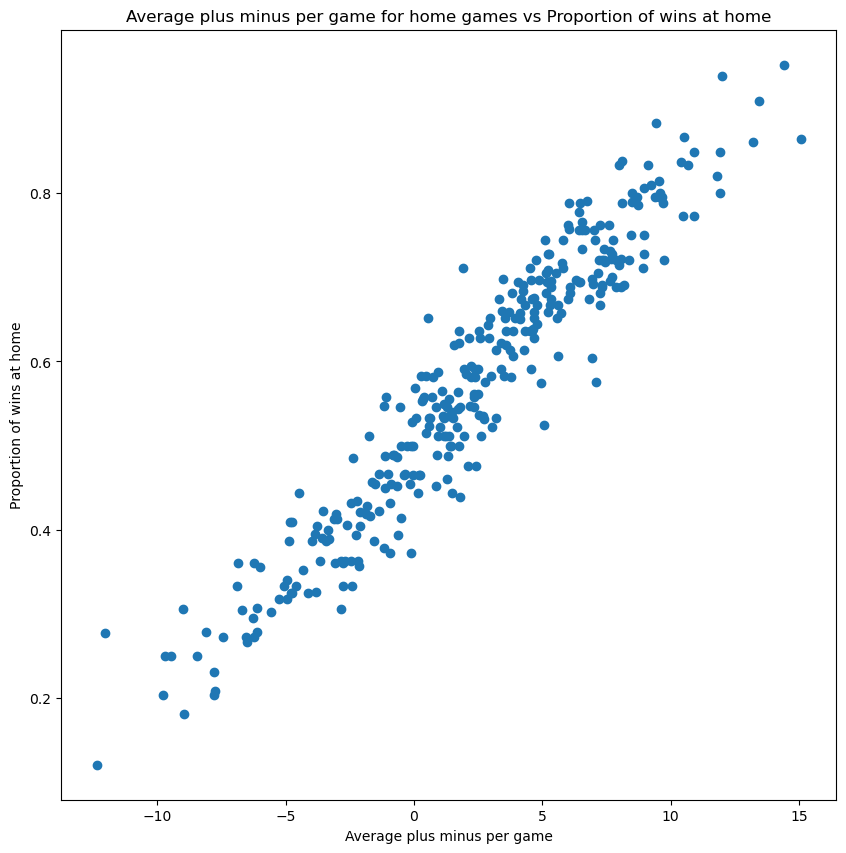

In [103]:
f = plt.figure(figsize=(10, 10))
plt.scatter(home_stats["PLUS_MINUS"]/home_combined_df["Regular_season"],home_stats["Home Win Percentage"])
plt.title("Average plus minus per game for home games vs Proportion of wins at home")
plt.xlabel("Average plus minus per game")
plt.ylabel("Proportion of wins at home")


Text(0, 0.5, 'Proportion of wins away')

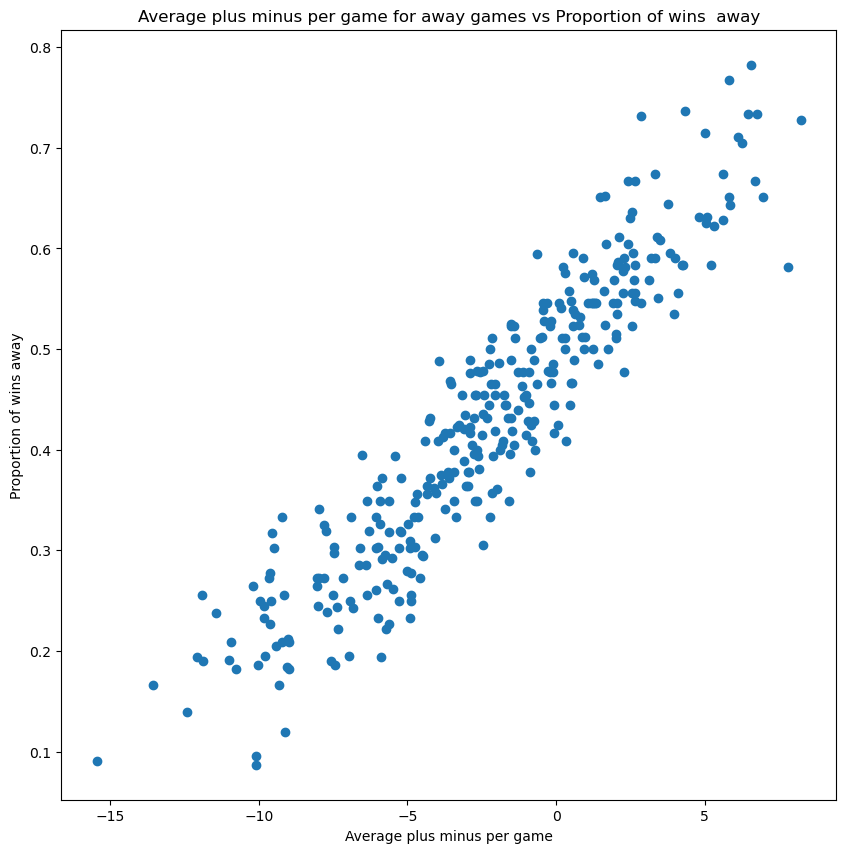

In [105]:
f = plt.figure(figsize=(10, 10))
plt.scatter(away_stats["PLUS_MINUS"]/away_combined_df["Regular_season"],away_stats["Away Win Percentage"])
plt.title("Average plus minus per game for away games vs Proportion of wins  away")
plt.xlabel("Average plus minus per game")
plt.ylabel("Proportion of wins away")
